In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

customer_data = pd.read_excel('LS2_Customer_data.xlsx')
purchase_data = pd.read_excel('LS2_Purchase_data.xlsx')

In [2]:
customer_data.head()

,User_ID,annual_income,number_of_children,proximity_town
0,1000001,185,2,5.294648
1,1000002,185,0,NaN
2,1000003,185,1,0.321483
3,1000004,200,0,9.065729
4,1000005,200,1,8.198126


In [3]:
customer_data.describe()

,User_ID,annual_income,number_of_children,proximity_town
count,5.424000e+03,5424.000000,5424.00000,5265.000000
mean,1.002985e+06,246.730273,0.96663,20.278161
std,1.758265e+03,96.511660,0.98401,20.698569
min,1.000001e+06,185.000000,0.00000,0.002735
25%,1.001437e+06,185.000000,0.00000,5.437241
50%,1.002986e+06,200.000000,1.00000,14.317117
75%,1.004503e+06,300.000000,2.00000,28.020375
max,1.006040e+06,900.000000,7.00000,185.273776


In [4]:
purchase_data.head()

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Remove unwanted column for purchase_data

In [5]:
purchase_data.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [6]:
purchase_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.000000e+04,50000.000000,50000.000000,50000.000000,34279.000000,15183.000000,50000.000000
mean,1.002553e+06,8.143420,0.409760,5.304600,9.869308,12.709478,9278.543340
std,1.787739e+03,6.587752,0.491794,3.718432,5.066454,4.122255,4953.748142
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001015e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5852.000000
50%,1.002103e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8045.000000
75%,1.004072e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12033.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23958.000000


In [7]:
customer_data.drop_duplicates(subset='User_ID',inplace=True)

In [11]:
customer_data = customer_data.drop(columns='proximity_town')
customer_data 

,User_ID,annual_income,number_of_children
0,1000001,185,2
1,1000002,185,0
2,1000003,185,1
3,1000004,200,0
4,1000005,200,1
...,...,...,...
5419,1001573,185,0
5420,1001604,300,1
5421,1001621,300,0
5422,1001633,200,0


In [12]:
merged_data = pd.merge(customer_data,purchase_data,on='User_ID',how='inner')
merged_data.head()

,User_ID,annual_income,number_of_children,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,185,2,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,185,2,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,185,2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,185,2,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000001,185,2,P00085942,F,0-17,10,A,2,0,2,4.0,8.0,12842


In [13]:
merged_data.describe()

,User_ID,annual_income,number_of_children,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,34279.000000,15183.000000,50000.000000
mean,1.002553e+06,246.864100,0.945240,8.143420,0.409760,5.304600,9.869308,12.709478,9278.543340
std,1.787739e+03,97.486331,0.991736,6.587752,0.491794,3.718432,5.066454,4.122255,4953.748142
min,1.000001e+06,185.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001015e+06,185.000000,0.000000,2.000000,0.000000,1.000000,5.000000,9.000000,5852.000000
50%,1.002103e+06,200.000000,1.000000,7.000000,0.000000,5.000000,9.000000,14.000000,8045.000000
75%,1.004072e+06,300.000000,2.000000,14.000000,1.000000,8.000000,15.000000,16.000000,12033.000000
max,1.006040e+06,900.000000,7.000000,20.000000,1.000000,18.000000,18.000000,18.000000,23958.000000


In [25]:
grouped_user = merged_data.groupby('User_ID')[['annual_income','Purchase','number_of_children']].sum()
grouped_user

,annual_income,Purchase,number_of_children
User_ID,,,
1000001,925,38891,10
1000002,925,37417,0
1000003,740,49947,4
1000004,800,66607,0
1000005,1600,50684,8
...,...,...,...
1006035,925,42357,0
1006036,8700,196339,29
1006037,2400,86597,8


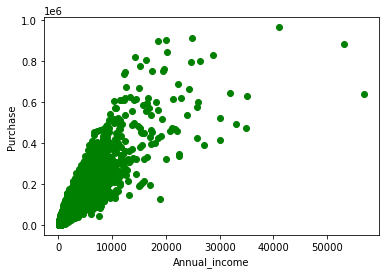

In [17]:
plt.scatter(grouped_user['annual_income'],grouped_user['Purchase'],color='green')
plt.xlabel('Annual_income')
plt.ylabel('Purchase')
plt.show()

In [26]:
grouped_user.corr()

,annual_income,Purchase,number_of_children
annual_income,1.000000,0.866205,0.483516
Purchase,0.866205,1.000000,0.543062
number_of_children,0.483516,0.543062,1.000000


The graph shows that there is a high correlation between the purchase and annual income. As higher annual income customer tends to spend more.

{'whiskers': [<matplotlib.lines.Line2D at 0x17a0adaef10>,
 'caps': [<matplotlib.lines.Line2D at 0x17a0b029610>,
 'boxes': [<matplotlib.lines.Line2D at 0x17a0adaebb0>],
 'medians': [<matplotlib.lines.Line2D at 0x17a0b029cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17a0b0330a0>],
 'means': []}

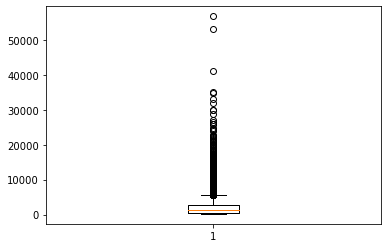

In [24]:

plt.boxplot(grouped_user['annual_income'])